In this work, we study the simulation of Jake's Model.
We observe the following:


*   Received Envelope variation with Doppler spread
*   Received Envelopes for Rayleigh and Rician fading with varying Rician factors



##Import Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

##Declare Functions

In [2]:
def jakes_model(fd, Duration):
  # This function simulates Jake's fading model
  # The function returns the fading envelope for the parameters fd and Duration
  # fd: Doppler spread
  # Duration: The duration of the signal

    M = 20       # number of frequencies
    N = 4 * M + 2   # inverse will give frequency resolution

    T = int(Duration / 0.001)   # no of samples

    # Initializing variables
    z_r = np.zeros(T)
    z_i = np.zeros(T)

    phi_r = -np.pi + (2 * np.pi) * np.random.rand(M, 1)   # random phase angle real
    phi_i = -np.pi + (2 * np.pi) * np.random.rand(M, 1)   # random phase angle imag
    phi0 = -np.pi + (2 * np.pi) * np.random.rand(1, 1)    # random phase offset

    for t in range(T):
        for n in range(M):
            beta_n = np.pi * n / (M + 1)
            fn = fd * np.cos(2 * np.pi * n / N)
            z_r[t] = z_r[t] + np.cos(beta_n) * np.cos(2 * np.pi * fn * 0.001 * t + phi_r[n])
            z_i[t] = z_i[t] + np.cos(beta_n) * np.sin(2 * np.pi * fn * 0.001 * t + phi_i[n])
        z_r[t] = z_r[t] + np.sqrt(2) * np.cos(2 * np.pi * fd * t + phi0)

    z_r = (2 / np.sqrt(N)) * z_r  # In-phase part
    z_i = (2 / np.sqrt(N)) * z_i  # Quadrature part
    z = z_r + 1j * z_i  # Adding in-phase and quadrature parts
    r = np.abs(z)  # The received envelope
    # Return the fading envelope
    return r

##Setup Parameters to Simulate Jakes Model

In [3]:
fd = 100  # Doppler frequency
Duration = 5  # Duration of simulation
tau = 0.001  # Time corresponding to a single
T = int(Duration / tau)  # No of samples
M = 100  # No of simulations


##Received envelopes

###for 1Hz of Doppler Frequency

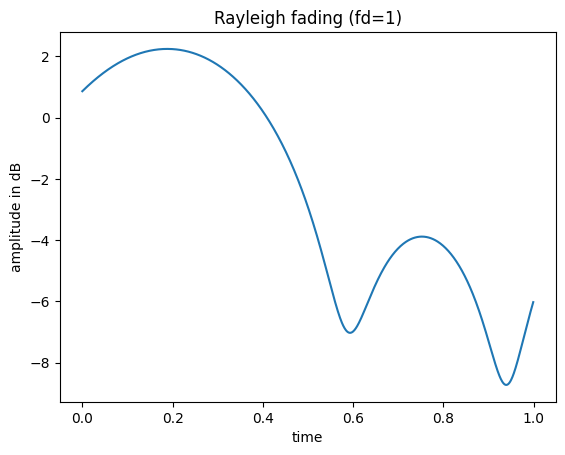

In [9]:
# ===========================   ===========================

# Plotting for 1Hz of Doppler Frequency
fd = 1
Duration = 1
t = np.arange(0, Duration, tau)
v = jakes_model(fd, Duration)
v_rms = np.sqrt(np.mean(v**2))
rho1 = v / v_rms
rho1_db = 10 * np.log10(rho1)

plt.figure()
plt.plot(t, rho1_db)
plt.title('Rayleigh fading (fd=1)')
plt.xlabel('time')
plt.ylabel('amplitude in dB')
plt.show()


###for 10Hz of Doppler Frequency

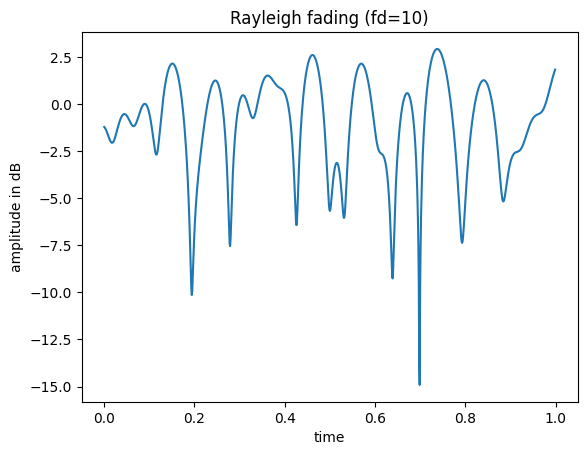

In [10]:
# Plotting for 10 Hz of Doppler Frequency
fd = 10
Duration = 1
t = np.arange(0, Duration, tau)
v = jakes_model(fd, Duration)
v_rms = np.sqrt(np.mean(v**2))
rho1 = v / v_rms
rho1_db = 10 * np.log10(rho1)

plt.figure()
plt.plot(t, rho1_db)
plt.title('Rayleigh fading (fd=10)')
plt.xlabel('time')
plt.ylabel('amplitude in dB')
plt.show()


###for 100Hz of Doppler Frequency

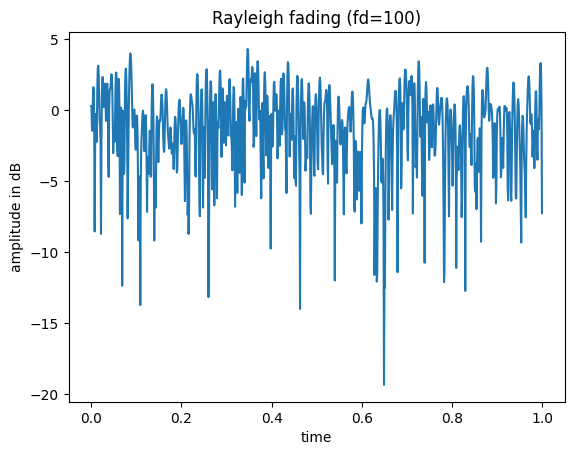

In [11]:

# Plotting for 100 Hz of Doppler Frequency
fd = 100
Duration = 1
t = np.arange(0, Duration, tau)
v = jakes_model(fd, Duration)
v_rms = np.sqrt(np.mean(v**2))
rho1 = v / v_rms
rho1_db = 10 * np.log10(rho1)

plt.figure()
plt.plot(t, rho1_db)
plt.title('Rayleigh fading (fd=100)')
plt.xlabel('time')
plt.ylabel('amplitude in dB')
plt.show()


## Rician Fading

In [4]:
# ==================== Rician Fading ========================================
fd = 100
Duration = 1
t = np.arange(0, Duration, tau)

v = jakes_model(fd, Duration)
v_rms = np.sqrt(np.mean(v**2))
rho1 = v / v_rms
rho1_db = 10 * np.log10(rho1)


### For K = 1

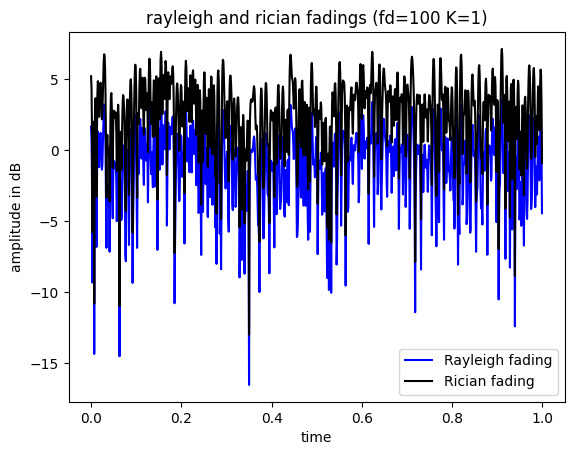

In [5]:

# ----------------------- K = 1 -------------------------------------------
K = 1
los1 = rho1 * 10**(K / 10)
z1 = los1 + rho1

plt.figure()
plt.plot(t, rho1_db, 'b', label='Rayleigh fading')
plt.plot(t, 10 * np.log10(z1), 'k', label='Rician fading')
plt.title('rayleigh and rician fadings (fd=100 K=1)')
plt.xlabel('time')
plt.ylabel('amplitude in dB')
plt.legend()
plt.show()



### For K = 4

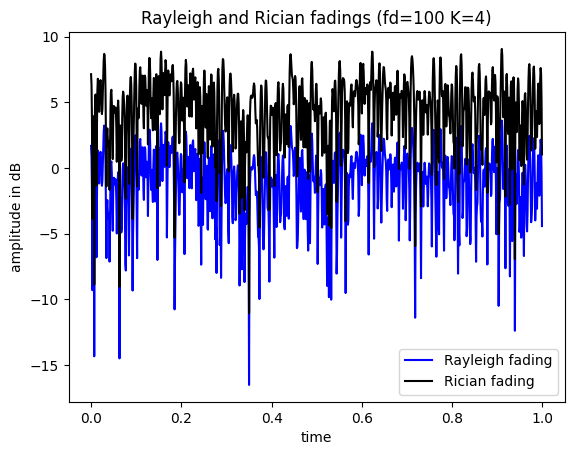

In [6]:

# ----------------------- K = 4 -------------------------------------------
K = 4
los2 = rho1 * 10**(K / 10)
z2 = los2 + rho1

plt.figure()
plt.plot(t, rho1_db, 'b', label='Rayleigh fading')
plt.plot(t, 10 * np.log10(z2), 'k', label='Rician fading')
plt.title('Rayleigh and Rician fadings (fd=100 K=4)')
plt.xlabel('time')
plt.ylabel('amplitude in dB')
plt.legend()
plt.show()

### For K = 10

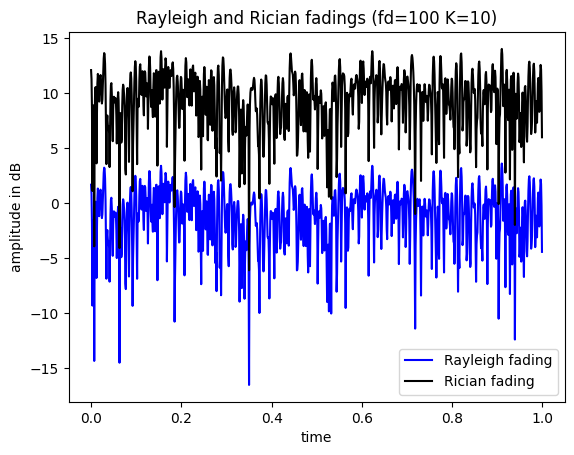

In [7]:
# ----------------------- K = 10 ------------------------------------------
K = 10
los3 = rho1 * 10**(K / 10)
z3 = los3 + rho1

plt.figure()
plt.plot(t, rho1_db, 'b', label='Rayleigh fading')
plt.plot(t, 10 * np.log10(z3), 'k', label='Rician fading')
plt.title('Rayleigh and Rician fadings (fd=100 K=10)')
plt.xlabel('time')
plt.ylabel('amplitude in dB')
plt.legend()
plt.show()